In [2]:
library(cluster)

In [3]:
# Loading the dataset
data <- read.csv("/content/Cleaned_data.csv")

In [4]:
# Sampling 50 data points
sampled_data <- data[sample(nrow(data), 50), ]

In [5]:
# Selecting columns from the sampled dataframe
features <- sampled_data[, c("Quality.of.Sleep", "Heart.Rate", "Daily.Steps")]

In [6]:
# Standardizing the features
scaled_features <- scale(features)

In [7]:
# Function to calculate cosine similarity
cosine_similarity <- function(x, y) {
  sum_x <- sum(x^2)
  sum_y <- sum(y^2)
  dot_prod <- sum(x * y)
  similarity <- dot_prod / (sqrt(sum_x) * sqrt(sum_y))
  return(similarity)
}

In [8]:
#Computing cosine similarity
n <- nrow(scaled_features)
cosine_sim <- matrix(0, n, n)
for (i in 1:n) {
  for (j in 1:n) {
    cosine_sim[i, j] <- cosine_similarity(scaled_features[i, ], scaled_features[j, ])
  }
}

In [9]:
# Performing hierarchical clustering using hclust
hc <- hclust(as.dist(1 - cosine_sim), method = "complete")

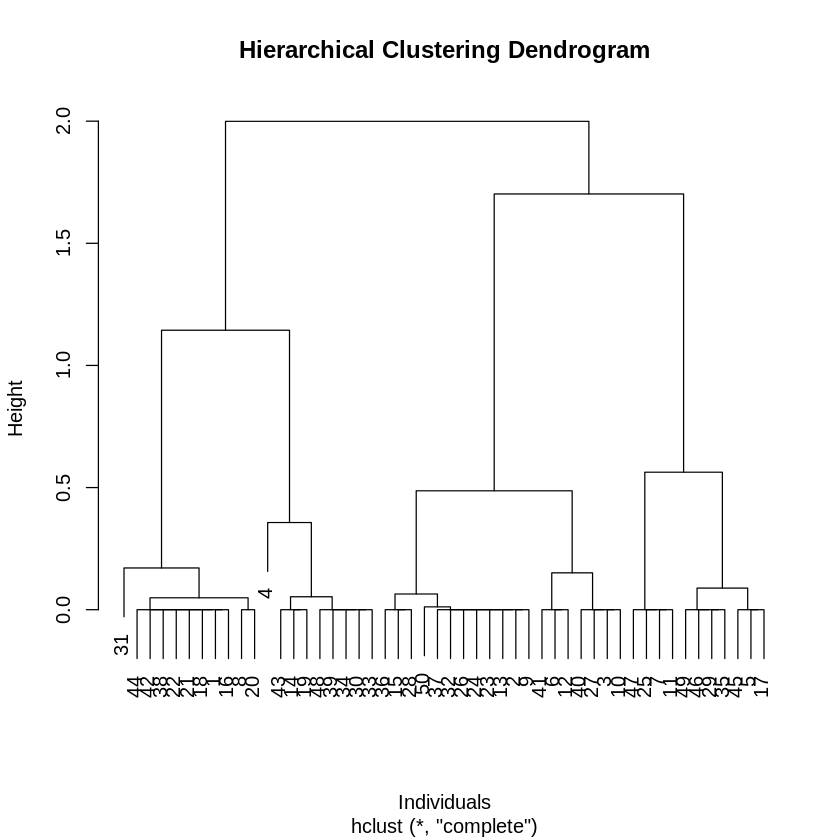

In [10]:
# Ploting the dendrogram
plot(hc, main = "Hierarchical Clustering Dendrogram", xlab = "Individuals", sub = NULL)

In [11]:
# Cuting the dendrogram to get clusters
clusters <- cutree(hc, k = 6)

In [12]:
# Adding cluster labels to the sampled dataset
sampled_data$Cluster <- clusters

In [13]:
# Getting the cluster centers (mean of each feature within each cluster)
cluster_centers <- aggregate(features, by=list(Cluster=clusters), FUN=mean)
print(cluster_centers)

  Cluster Quality.of.Sleep Heart.Rate Daily.Steps
1       1         6.727273   70.90909    8363.636
2       2         8.333333   67.91667    7041.667
3       3         8.000000   69.14286    8000.000
4       4         6.111111   73.33333    5144.444
5       5         8.571429   65.00000    5000.000
6       6         7.000000   65.00000    6000.000


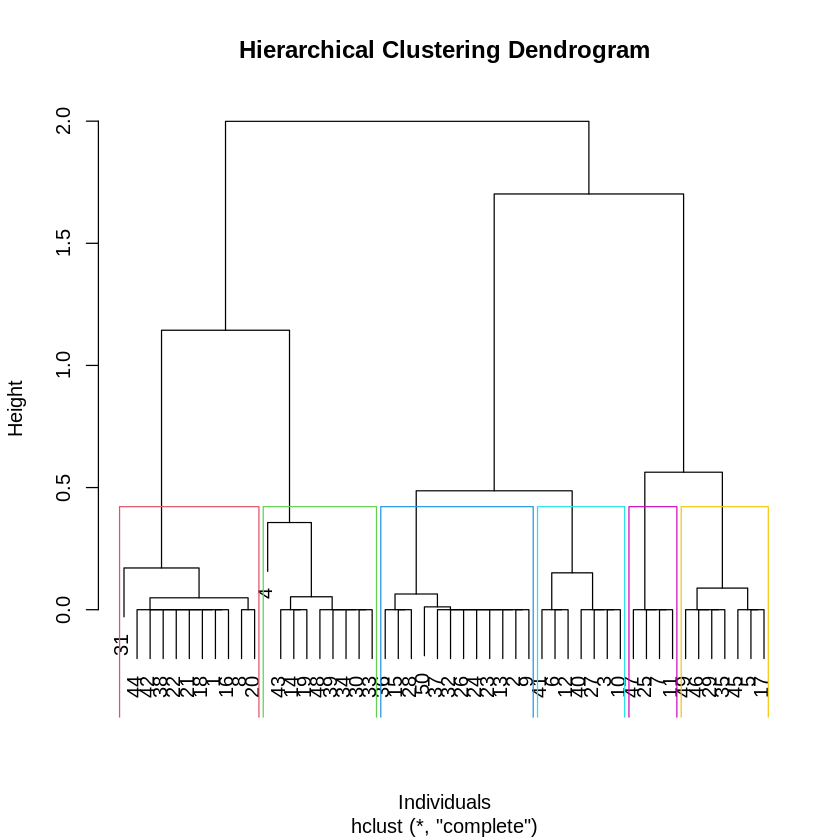

In [14]:
# Plotting the dendrogram with colored clusters
plot(hc, main = "Hierarchical Clustering Dendrogram", xlab = "Individuals", sub = NULL)
rect.hclust(hc, k = 6, border = 2:7)